# LOGISTIC REGRESSION

    CLASSIFICATION METHOD
    
    METHOD OF DOING LOGISTIC REGRESSION.
          
          WE TAKE LINEAR REGRESSION SOLUTION AND PLACE IT INTO THE SIGMOID/LOGISTIC FUNCTION AND LINEAR MODEL GETS CONVERTED INTO MORE COMPLEX MODEL.
          
          LOGISTIC FUNCTION USED IS SIGMOID FUNCTION
                  SIG(H(X))=1/(1+e^(-H(X)))
                  
                  THIS SIGMOID FUNCTION PROVIDES NON LINEARITY TO THE BASIC LINEAR FUNCTION
                  
                  PROBABILITY IS CALCULATED BY LOGISTIC REGRESSION.
                  
          COST FUNCTION 
                   
                   LINEAR REGRESSION USED MEAN SQUARE ERROR AS ITS COST FUNCTION AND IF IT IS USED FOR LOGISTIC REGRESSION NON CONVEX FUNCTION WILL BE FORMED AND THE GLOBAL MINIMA IS ONLY ACHIEVED ON CONVEX FUNCTION.
                   
                   COST(H(x),Y(ACTUAL))=-log(H(x))   IF Y=1
                                       =-log(1-H(x)) IF Y=0
                                       
          SIMPLIFIED COST/LOSS FUNCTION:
                   COST(H(x),Y(ACTUAL))=-Ylog(H(x))-(1-Y)log(1-H(x))
                                                IF Y=1,(1-Y)=0
                                                IF Y=0,(Y)=0
                                                
                                                
## USES 
     
     1.SPAM RECOGINIZATION
     2.LOAN PAYED OR NOT
     3.TYPE OF DISEASE 

In [47]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
x,y=make_classification(n_samples=1000,n_classes=2,n_features=2,n_informative=2,n_redundant=0,n_repeated=0)

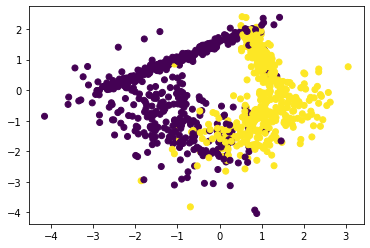

In [49]:
plt.scatter(x[:,0],x[:,1],c=y)

In [50]:
data = np.zeros((x.shape[0],x.shape[1]+1))
data[:,1:] = x
data[:,0] += 1.0

In [51]:
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.2,random_state=42)

In [52]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-1*z))

In [53]:
def hypo(x,w):
    out=w[0]*x[0]+w[1]*x[1]+w[2]*x[2]
    return sigmoid(out)

In [54]:
def get_error(x,w,y_true):
    err=0.0
    m=x.shape[0]
    for i in range(m):
        if (y_true[i]==0):
            err=err+(np.log(1-hypo(x[i],w)))
        else:
            err=err+(np.log(hypo(x[i],w)))
    err=err/m
    return err

In [55]:
def get_grad(x,w,y_true):
    grad_0=0.0
    grad_1=0.0
    grad_2=0.0
    m =x.shape[0]
    for i in range(m):
        grad_0=grad_0+(hypo(x[i],w)-y_true[i])*x[i][0]           #formulae after single differentiation
        grad_1=grad_1+(hypo(x[i],w)-y_true[i])*x[i][1]      #formulae after double differentiation
        grad_2=grad_2+(hypo(x[i],w)-y_true[i])*x[i][2]
    grad_0=grad_0/m                                      #final ans
    grad_1=grad_1/m                                     #final ans
    grad_2=grad_2/m
    return [grad_0,grad_1,grad_2]

In [56]:
def grad_des(x,w,y_true,lr=0.1):             #lr=learning rate function gives final ans for gradient algo
    error=get_error(x,w,y_true) 
    [grad_0,grad_1,grad_2]=get_grad(x,w,y_true)
    w[0]=w[0]-lr*grad_0                    #gradient descent 1 
    w[1]=w[1]-lr*grad_1                    #gradient descent 1 
    w[2]=w[2]-lr*grad_2  
    return error,w

In [61]:
w=np.array([0.0,0.0,0.0])
loss=[]
max_iters=500

[-0.44798959  2.71560556 -0.26033438]


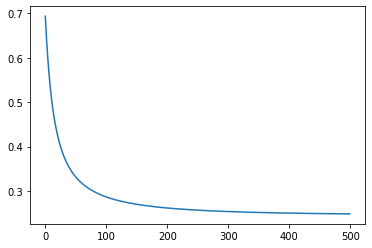

In [62]:
for i in range(max_iters):
    er,W=grad_des(x_train,w,y_train,lr=0.1)
    loss.append(-1*er)
print(W)
plt.plot(loss)
plt.show()